In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
MatrixType = "default"
# MatrixType = "upper_triangular"
# MatrixType = "symmetric"

In [3]:
gen = np.random.default_rng(seed=817)

In [4]:
def random_matrix(gen, m):
  A = gen.normal(0, 1/np.sqrt(m), (m, m))
  if MatrixType == 'upper_triangular':
    A = np.triu(A)
  elif MatrixType == 'symmetric':
    A = (A + A.T)/2
  return A

In [5]:
rows = []
instance_rows = []

for mx in np.r_[3:10]:
  m = 2**mx
  for _ in range(10):
    instance = len(instance_rows)
    A = random_matrix(gen, m)
    eigvals = np.linalg.eig(A).eigenvalues
    for ev in eigvals:
      rows.append({ 'instance': instance, 'm': m, 'eigenvalue': ev,
                   'eigenvalue_real': np.real(ev), 'eigenvalue_imag': np.imag(ev),
                    'eigenvalue_abs': np.abs(ev)})

    spectral_radius = np.max(np.abs(eigvals))
    s = np.linalg.svd(A).S
    norm2 = np.max(s)
    cond = np.max(s)/np.min(s)
    instance_rows.append({ 'instance': instance, 'm': m,
                 'spectral_radius': spectral_radius, 'norm': norm2, 'cond': cond})

In [6]:
df_instance = pd.DataFrame(instance_rows)
df_instance

,instance,m,spectral_radius,norm,cond
0,0,8,1.043511,1.579641,17.958488
1,1,8,0.914731,1.516843,35.621173
2,2,8,1.059599,1.932561,233.052455
3,3,8,0.922907,1.875726,40.586407
4,4,8,0.875777,1.741381,9.209063
...,...,...,...,...,...
65,65,512,1.050393,1.990855,933.745225
66,66,512,1.025189,1.983097,17029.528077
67,67,512,1.029721,1.975330,1085.145942
68,68,512,1.037988,2.001108,459.569793


In [7]:
df = pd.DataFrame(rows)
df

,instance,m,eigenvalue,eigenvalue_real,eigenvalue_imag,eigenvalue_abs
0,0,8,0.917699+0.496734j,0.917699,0.496734,1.043511
1,0,8,0.917699-0.496734j,0.917699,-0.496734,1.043511
2,0,8,0.181959+0.905928j,0.181959,0.905928,0.924021
3,0,8,0.181959-0.905928j,0.181959,-0.905928,0.924021
4,0,8,-0.737526+0.000000j,-0.737526,0.000000,0.737526
...,...,...,...,...,...,...
10155,69,512,-0.067354-0.058466j,-0.067354,-0.058466,0.089190
10156,69,512,0.028862+0.037542j,0.028862,0.037542,0.047355
10157,69,512,0.028862-0.037542j,0.028862,-0.037542,0.047355
10158,69,512,-0.046860+0.000000j,-0.046860,0.000000,0.046860


<Axes: xlabel='eigenvalue_real', ylabel='eigenvalue_imag'>

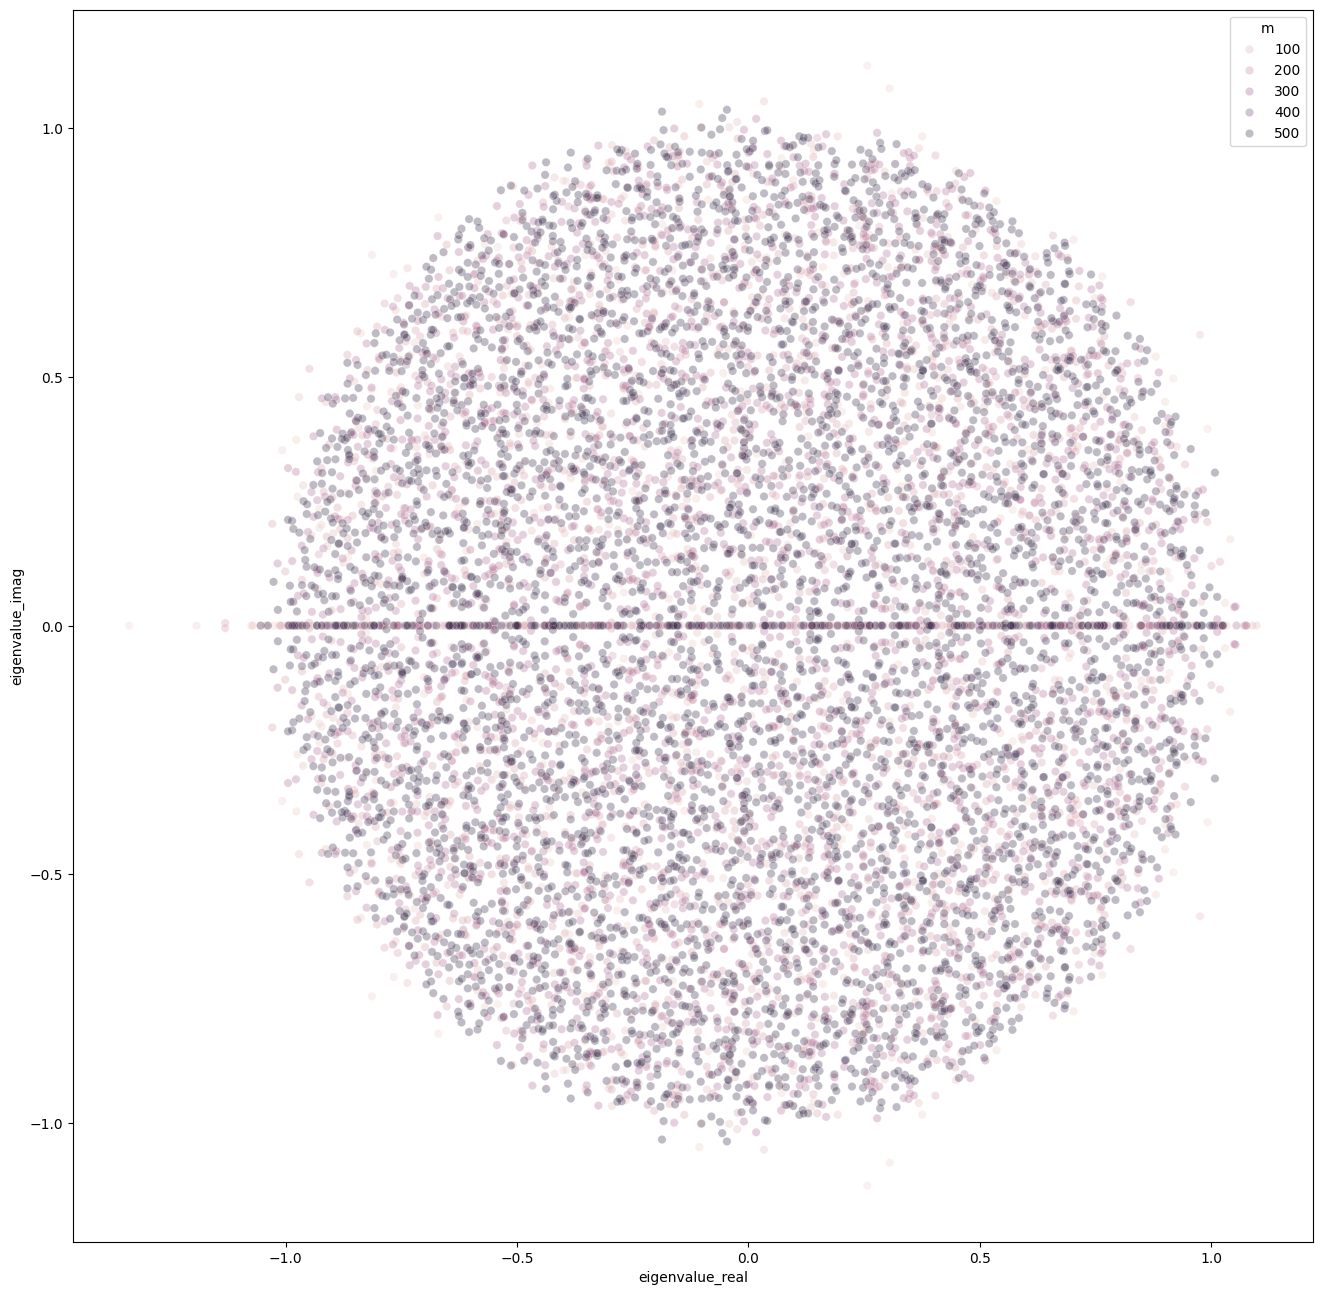

In [8]:
plt.figure(figsize=(16, 16))
sns.scatterplot(data=df, x='eigenvalue_real', y='eigenvalue_imag', hue='m', alpha=0.3)

Text(0.5, 1.0, 'Distribution of eigenvalue size')

<Figure size 2000x1000 with 0 Axes>

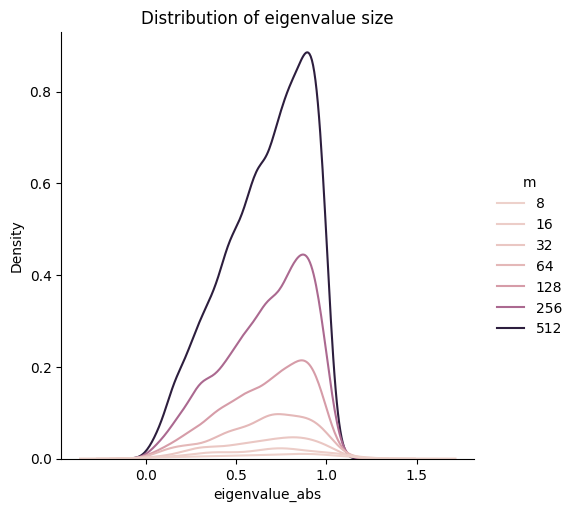

In [9]:
plt.figure(figsize=(20, 10))
sns.displot(data=df, x="eigenvalue_abs", hue="m", kind="kde")
plt.title("Distribution of eigenvalue size")

Text(0.5, 1.0, 'Distribution of spectral radius')

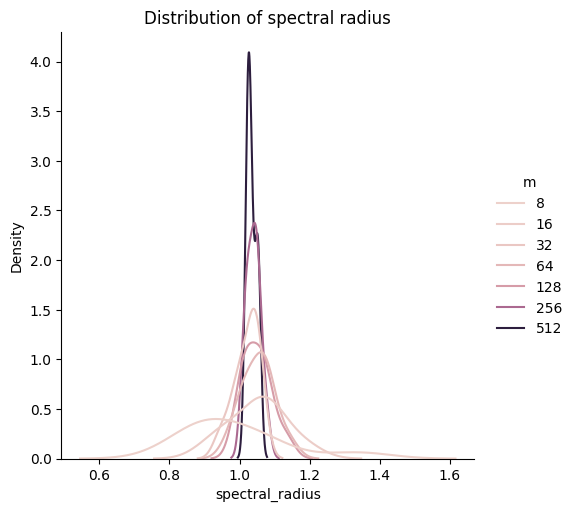

In [10]:
sns.displot(data=df_instance, x="spectral_radius", hue="m", kind="kde")
plt.title("Distribution of spectral radius")

Text(0.5, 1.0, 'Distribution of 2-norm')

<Figure size 2000x1000 with 0 Axes>

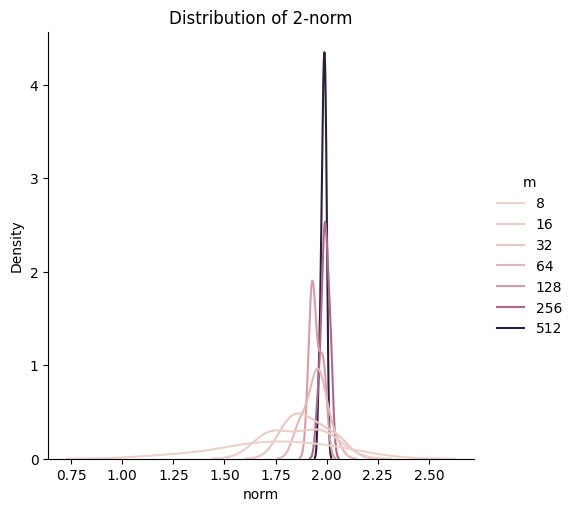

In [11]:
plt.figure(figsize=(20, 10))
sns.displot(data=df_instance, x="norm", hue="m", kind="kde")
plt.title("Distribution of 2-norm")

Text(0.5, 1.0, 'Condition number')

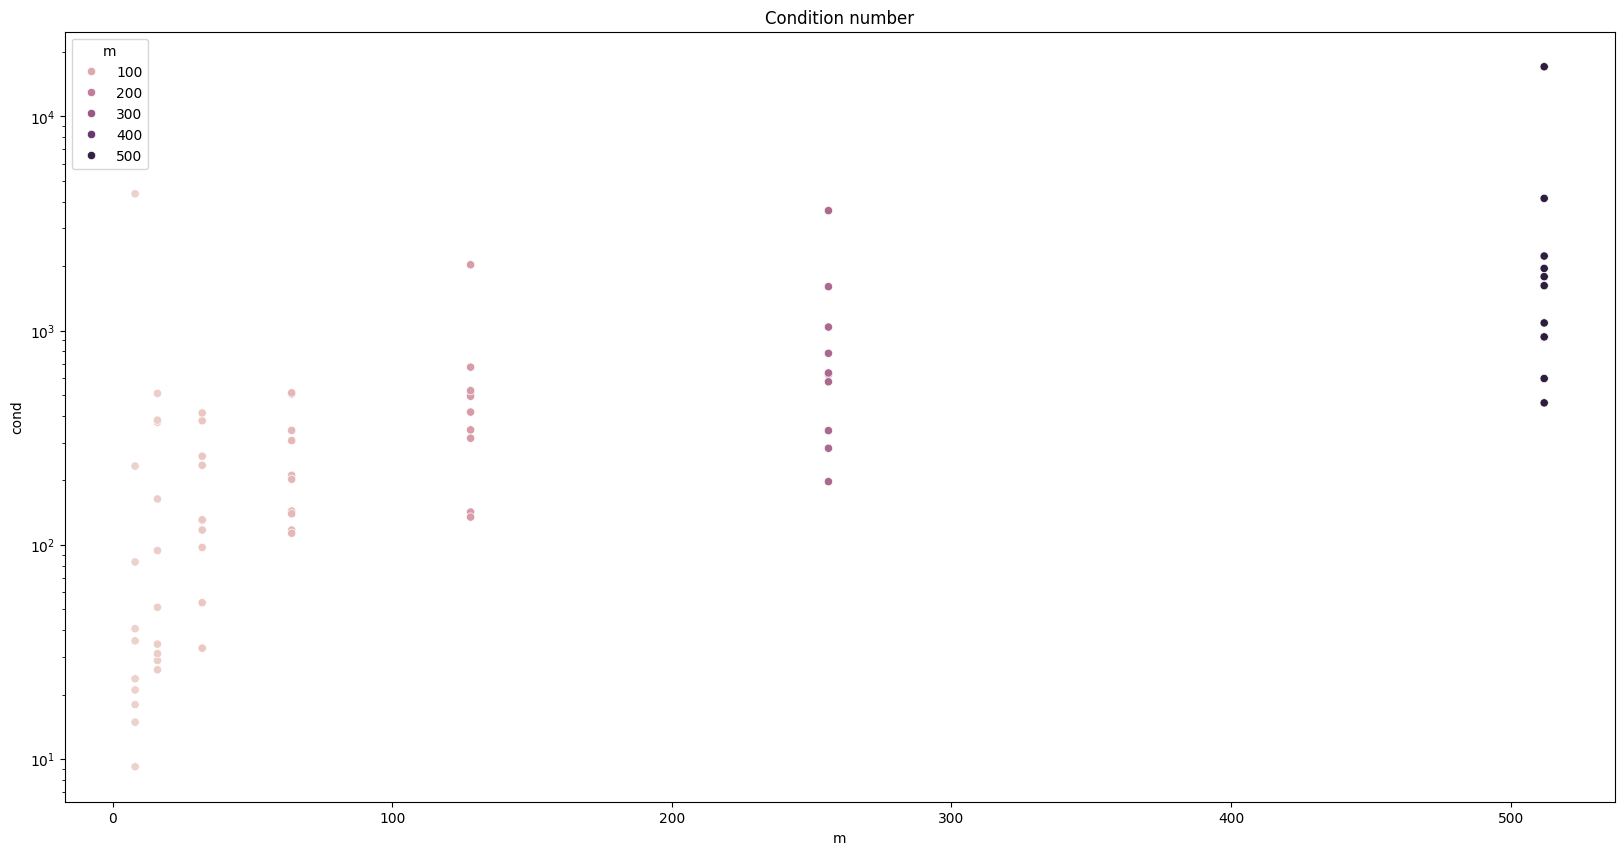

In [12]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df_instance, x="m", y="cond", hue="m")
plt.yscale('log')
plt.title("Condition number")